## Import data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("WineQT.csv")

In [3]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,NaN,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


## Identify and handle missing values

#### Identify missing values

In [4]:
# replace "?" to NaN
df.replace("?", np.nan, inplace=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,NaN,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


#### Evaluating for Missing Data

In [5]:
missing_data = df.isnull()
missing_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False,False,False


 *True" stands for missing value, while "False" stands for not missing value.*

#### Count missing values in each column

In [6]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

fixed acidity
fixed acidity
False    1143
Name: count, dtype: int64

volatile acidity
volatile acidity
False    1143
Name: count, dtype: int64

citric acid
citric acid
False    1139
True        4
Name: count, dtype: int64

residual sugar
residual sugar
False    1143
Name: count, dtype: int64

chlorides
chlorides
False    1143
Name: count, dtype: int64

free sulfur dioxide
free sulfur dioxide
False    1143
Name: count, dtype: int64

total sulfur dioxide
total sulfur dioxide
False    1143
Name: count, dtype: int64

density
density
False    1143
Name: count, dtype: int64

pH
pH
False    1141
True        2
Name: count, dtype: int64

sulphates
sulphates
False    1143
Name: count, dtype: int64

alcohol
alcohol
False    1143
Name: count, dtype: int64

quality
quality
False    1143
Name: count, dtype: int64

Id
Id
False    1143
Name: count, dtype: int64



#### Calculate the average of the column

In [7]:
avg_citric_acid = df["citric acid"].astype("float").mean(axis=0)
print("Average of citric acid:", avg_citric_acid)

Average of citric acid: 0.26865671641791045


#### Replace "NaN" by mean value in "citric acid" column

In [8]:
df["citric acid"] = df["citric acid"].replace(np.nan, avg_citric_acid)

#### Calculate the mean value for 'pH' column

In [9]:
avg_pH = df["pH"].astype("float").mean(axis=0)
print("Average of pH:", avg_pH )

Average of pH: 3.311007887817704


#### Replace "NaN" by mean value in "pH" column

In [10]:
df["pH"] = df["pH"].replace(np.nan, avg_pH)

In [11]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.000000,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.000000,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.040000,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.560000,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.268657,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


*Now, we obtain the dataset with no missing values.*

#### Correct data format

In [12]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [13]:
df.drop(columns=["Id"], inplace=True)

## Data Standardization

In [14]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.000000,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.000000,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.040000,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.560000,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.268657,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Plot the distribution of key features

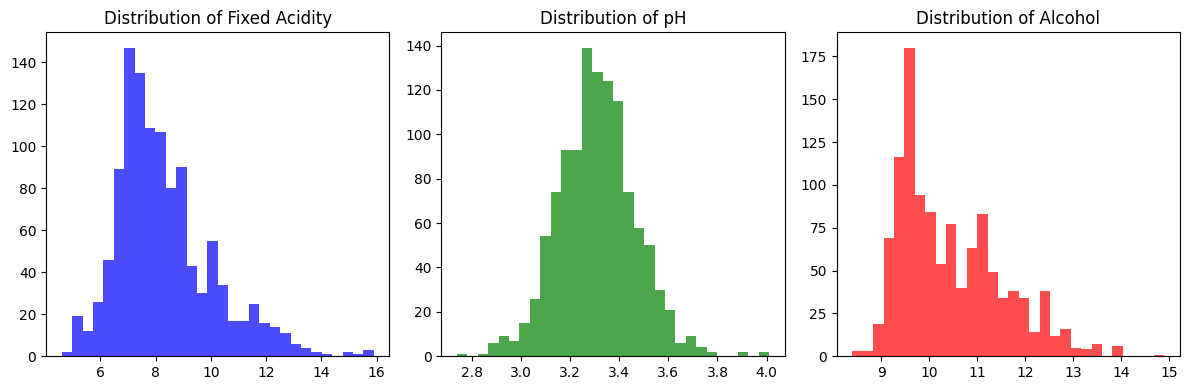

In [15]:
plt.figure(figsize=(12, 4))

# Plot Fixed Acidity
plt.subplot(1, 3, 1)
plt.hist(df['fixed acidity'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Fixed Acidity')

# Plot pH
plt.subplot(1, 3, 2)
plt.hist(df['pH'], bins=30, color='green', alpha=0.7)
plt.title('Distribution of pH')

# Plot Alcohol
plt.subplot(1, 3, 3)
plt.hist(df['alcohol'], bins=30, color='red', alpha=0.7)
plt.title('Distribution of Alcohol')

plt.tight_layout()
plt.show()


### Function to classify wines based on certain features

#### Feature Engineering

In [16]:
def classify_wine(row):
    if row['fixed acidity'] > 7.5 and row['pH'] < 3.3 and row['alcohol'] > 11:
        return 'red'
    else:
        return 'white'
df['wine_type'] = df.apply(classify_wine, axis=1)

print(df[['fixed acidity', 'pH', 'alcohol', 'wine_type']].head())

   fixed acidity    pH  alcohol wine_type
0            7.4  3.51      9.4     white
1            7.8  3.20      9.8     white
2            7.8  3.26      9.8     white
3           11.2  3.16      9.8     white
4            7.4  3.51      9.4     white


In [17]:
df["wine_type"].value_counts()

wine_type
white    1039
red       104
Name: count, dtype: int64

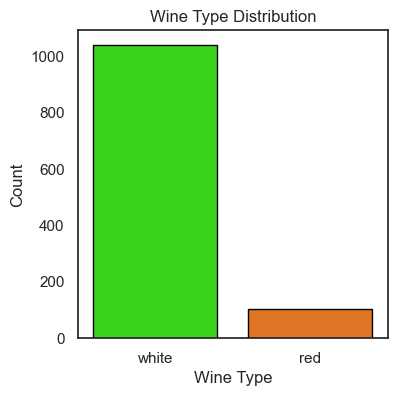

In [18]:
plt.figure(figsize=(4, 4))
sns.set(style="white")
sns.countplot(x='wine_type', data=df,hue='wine_type', palette="gist_ncar",edgecolor='black')

plt.xlabel("Wine Type")
plt.ylabel("Count")
plt.title("Wine Type Distribution",)

plt.show()


### Scatter plot to check if fixed acidity and pH separate the wines

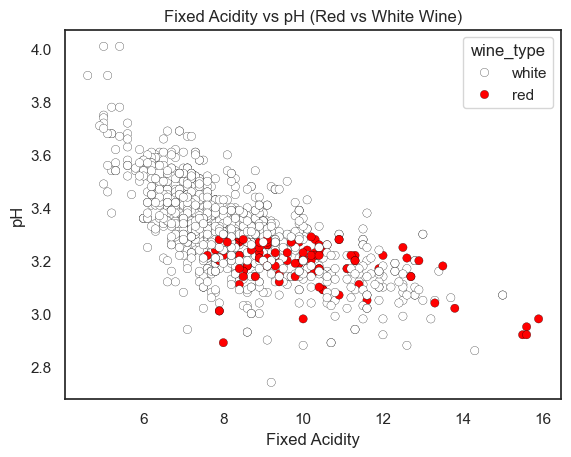

In [19]:
color_mapping = {'red': 'red', 'white': 'white'}
sns.scatterplot(data=df, x='fixed acidity', y='pH', hue='wine_type', palette=color_mapping,
                edgecolor='black', linewidth=0.2)

plt.xlabel('Fixed Acidity')
plt.ylabel('pH')
plt.title('Fixed Acidity vs pH (Red vs White Wine)')

# Show the plot
plt.show()


In [20]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.000000,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,white
1,7.8,0.88,0.000000,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,white
2,7.8,0.76,0.040000,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,white
3,11.2,0.28,0.560000,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,white
4,7.4,0.70,0.268657,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,white


### Function to categorize wine quality

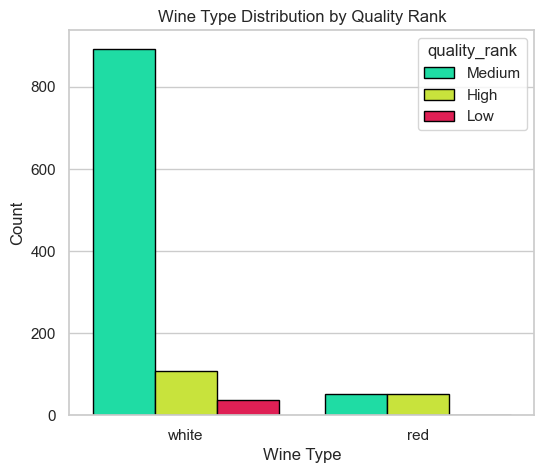

In [21]:
def quality_rank(quality):
    if quality <= 4:
        return 'Low'
    elif 5 <= quality <= 6:
        return 'Medium'
    else:
        return 'High'
        
df['quality_rank'] = df['quality'].apply(quality_rank)

plt.figure(figsize=(6, 5))
sns.set(style="whitegrid")
sns.countplot(x='wine_type', hue='quality_rank', data=df, palette="gist_ncar", edgecolor='black')

plt.xlabel("Wine Type")
plt.ylabel("Count")
plt.title("Wine Type Distribution by Quality Rank")

plt.show()


## Data Normalization

### Initial Model Training and Evaluation

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from joblib import dump, load


# Assuming df is your dataframe
X = df[['fixed acidity', 'pH', 'alcohol', 'quality']]  # Features
y = df['wine_type']  # Target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the scaler and normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

dump(model, "Dragon.joblib")  # Save model as 'Dragon.joblib'

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         red       1.00      0.97      0.99        40
       white       1.00      1.00      1.00       303

    accuracy                           1.00       343
   macro avg       1.00      0.99      0.99       343
weighted avg       1.00      1.00      1.00       343



### Grid Search for Hyperparameter Tuning

In [23]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


### Confusion Matrix

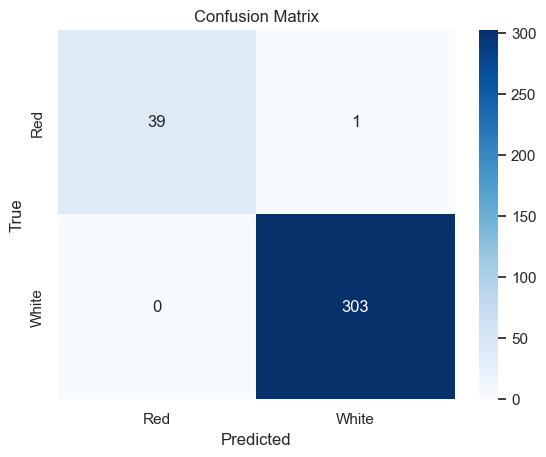

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict using the best model found from GridSearchCV
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Red', 'White'], yticklabels=['Red', 'White'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


###  ROC Curve

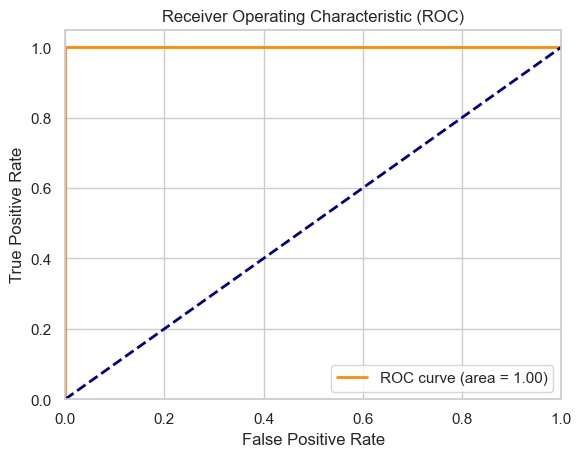

In [25]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test_scaled)[:, 1], pos_label='white')
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


### Cross-Validation

In [26]:
from sklearn.model_selection import cross_val_score

# Cross-validation
cv_scores = cross_val_score(best_model, X, y, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean()}")


Cross-validation scores: [1.         1.         1.         0.99561404 0.98684211]
Average cross-validation score: 0.9964912280701753


### Feature Importances

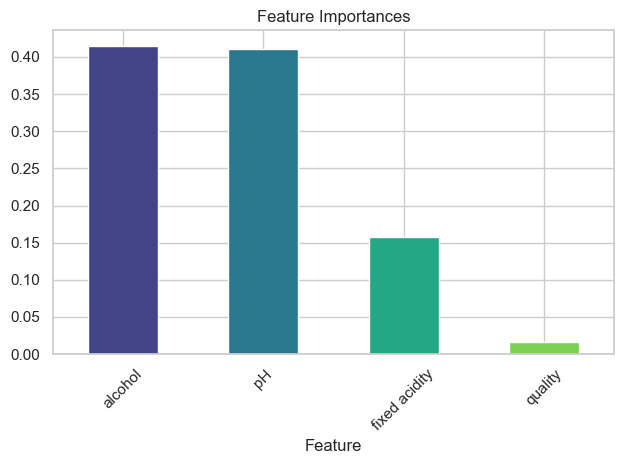

In [27]:
# Get feature importances
importances = best_model.feature_importances_
features = X.columns

# Create a DataFrame for easy visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
#importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False)
importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False, color=sns.color_palette("viridis", len(importance_df)))

plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Learning Curves

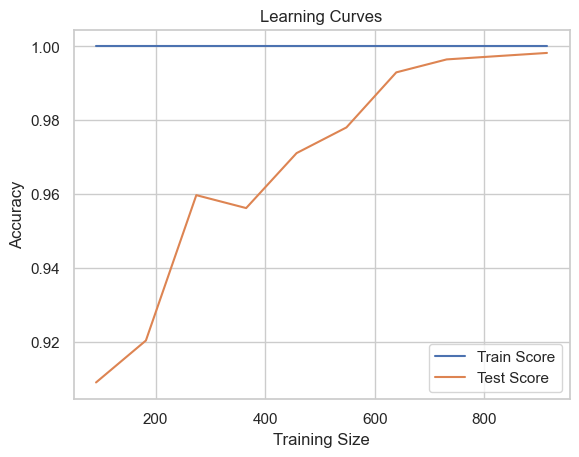

In [28]:
from sklearn.model_selection import StratifiedKFold, learning_curve
import matplotlib.pyplot as plt

# StratifiedKFold for preserving class distribution in each fold
cv = StratifiedKFold(n_splits=5)

# Scale the entire feature set (X)
X_scaled = scaler.fit_transform(X)

# Compute learning curves
train_sizes, train_scores, test_scores = learning_curve(best_model, X_scaled, y, cv=cv, train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

# Plot learning curves
plt.plot(train_sizes, train_scores.mean(axis=1), label='Train Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Test Score')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curves')
plt.show()


## Logistic Regression Performance Metrics

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 1. Generate a sample dataset for binary classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# 2. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = model.predict(X_test)

# 5. Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 6. Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 7. Display evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.8500
Precision: 0.8767
Recall: 0.8258
F1-Score: 0.8505


## Export CSV file

In [30]:
# Save the DataFrame to CSV file
df.to_csv('wine_data_with_predictions.csv', index=False)

## Model Testing: User Input Based Prediction

In [31]:
from sklearn.preprocessing import StandardScaler

# Function to get user input and make predictions
def predict_wine_type():
    # Take input from the user
    fixed_acidity = float(input("Enter fixed acidity: "))
    pH = float(input("Enter pH: "))
    alcohol = float(input("Enter alcohol content: "))
    quality = int(input("Enter quality (integer): "))
    
    # Create a DataFrame for the input
    user_input = pd.DataFrame([[fixed_acidity, pH, alcohol, quality]], columns=['fixed acidity', 'pH', 'alcohol', 'quality'])
    
    # Preprocess (scale the input features)
    scaler = StandardScaler()
    user_input_scaled = scaler.fit_transform(user_input)
    
    # Use the trained model to make a prediction
    prediction = best_model.predict(user_input_scaled)
    
    # Output the prediction
    print(f"The predicted wine type is: {prediction[0]}")

# Run the function to get prediction from the user
predict_wine_type()


Enter fixed acidity:  13.5
Enter pH:  3.18
Enter alcohol content:  13.0
Enter quality (integer):  5


The predicted wine type is: white


In [32]:
from joblib import dump, load
dump(model, "Wine_Pre.joblib")

['Wine_Pre.joblib']